# RegTech Session: Transaction monitoring 

This session present an example focusing on transaction monitoring on an abstract level. We cover the following topis:

* Model of a transaction system
* Classical transaction schemes.
* Detection based on node-properties
* Detection based on transaction structures
* Limitations and Challenges


In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd

from transaction_laboratory import transactionLaboratory
from schemes import random_behavior, layering, round_tripping

In [2]:
#set up agents

#random compliant agents
N_ra = 500
compliant_accounts = ['C' + str(i) for i in range(N_ra)]

#non-compliant agents performing round tripping
N_rt_source_accounts, N_rt_intermediate_accounts, N_rt_target_accounts = 10, 25, 4
rt_accounts = {
    'source_accounts': ['S' + str(i) for i in range(N_rt_source_accounts)],
    'intermediate_accounts': ['I' + str(i) for i in range(N_rt_intermediate_accounts)],
    'target_accounts': ['T' + str(i) for i in range(N_rt_target_accounts)]
}
rt_all_accounts = rt_accounts['source_accounts'] + rt_accounts['intermediate_accounts'] + rt_accounts['target_accounts']

#all acounts
allAccounts = compliant_accounts + rt_all_accounts

In [3]:
rb = random_behavior(allAccounts)
df_rb = rb.generate(1000)
# rb.plotTransactionGraph(df_rb, edgeLables=False, title="Transaction Graph Between " + str(rb.N)  + " Entities") #TODO: maybe make this plot animated in time

rt = round_tripping(rt_accounts)
df_rt = rt.generate(max_intermediate_transactions = 30)
#rb.plotTransactionGraph(df_rt, edgeLables=False, title="Transaction Graph of round tripping") #TODO: maybe make this plot animated in time


In [4]:
df = pd.concat([df_rb, df_rt])
df = df.sort_values('time')
print(df.shape)
df.head(10)

(1185, 4)


,source,target,amount,time
179,S1,I17,33.16,2025-03-01 08:00:01
23,S7,I17,115325.72,2025-03-01 08:00:02
84,S6,I7,47893.92,2025-03-01 08:00:04
106,S6,I15,88658.54,2025-03-01 08:00:05
85,I7,I23,47893.92,2025-03-01 08:00:05
86,I23,I19,47893.92,2025-03-01 08:00:05
0,C84,C395,235.55,2025-03-01 08:00:06
42,S2,I4,219994.21,2025-03-01 08:00:06
60,S5,I22,122931.30,2025-03-01 08:00:06
0,S6,I10,388890.48,2025-03-01 08:00:07


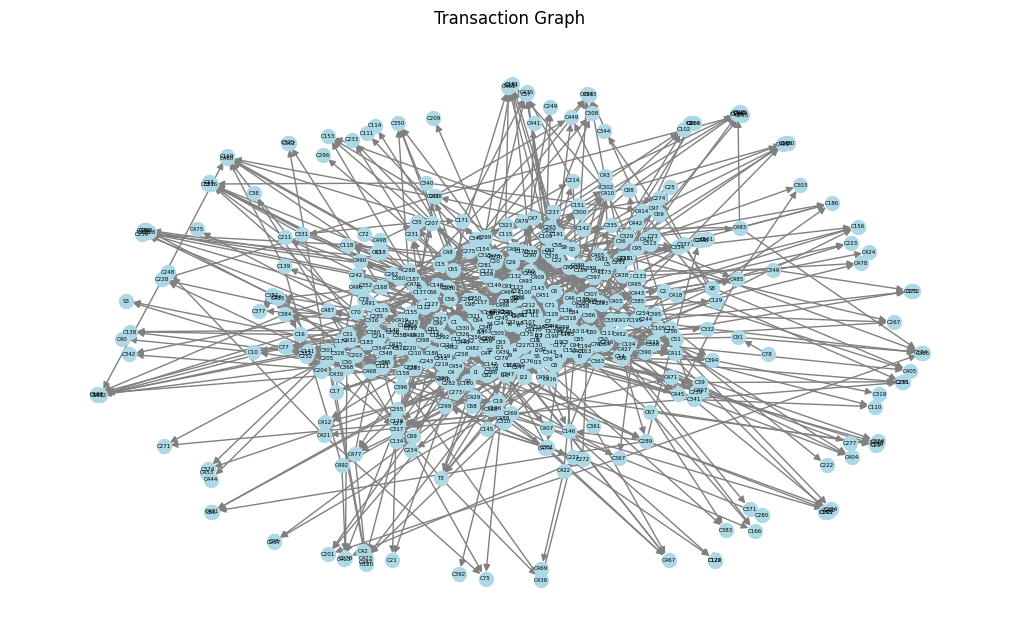

In [5]:
rb.plotTransactionGraph(df, edgeLables=False, title="Transaction Graph") #TODO: maybe make this plot animated in time